# **Support Vector Machine - digits**

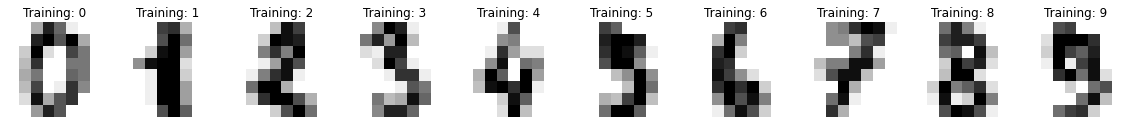

In [ ]:
# https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py

from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
import pandas as pd

X = pd.DataFrame(digits.data, columns=digits.feature_names)
len(X)

1797

In [ ]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.svm import SVC
import numpy as np

max_sol = 0

for c in np.arange(0.01, 10.0, 0.1):
  for g in np.arange(0.01, 10.0, 0.1):
    model = SVC(C=c, gamma = g)
    model.fit(X_train, y_train)
    sol = model.score(X_test, y_test)
    if sol > max_sol:
      max_sol=sol
      best_c, best_g = c, g


In [ ]:
print(best_g, best_c, max_sol)

0.1 0.1 0.06944444444444445


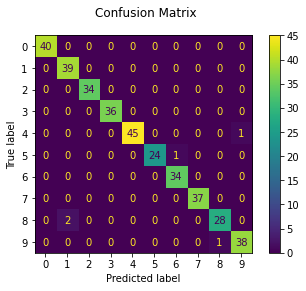

In [ ]:
from sklearn import metrics

predicted = model.predict(X_test)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")

plt.show()